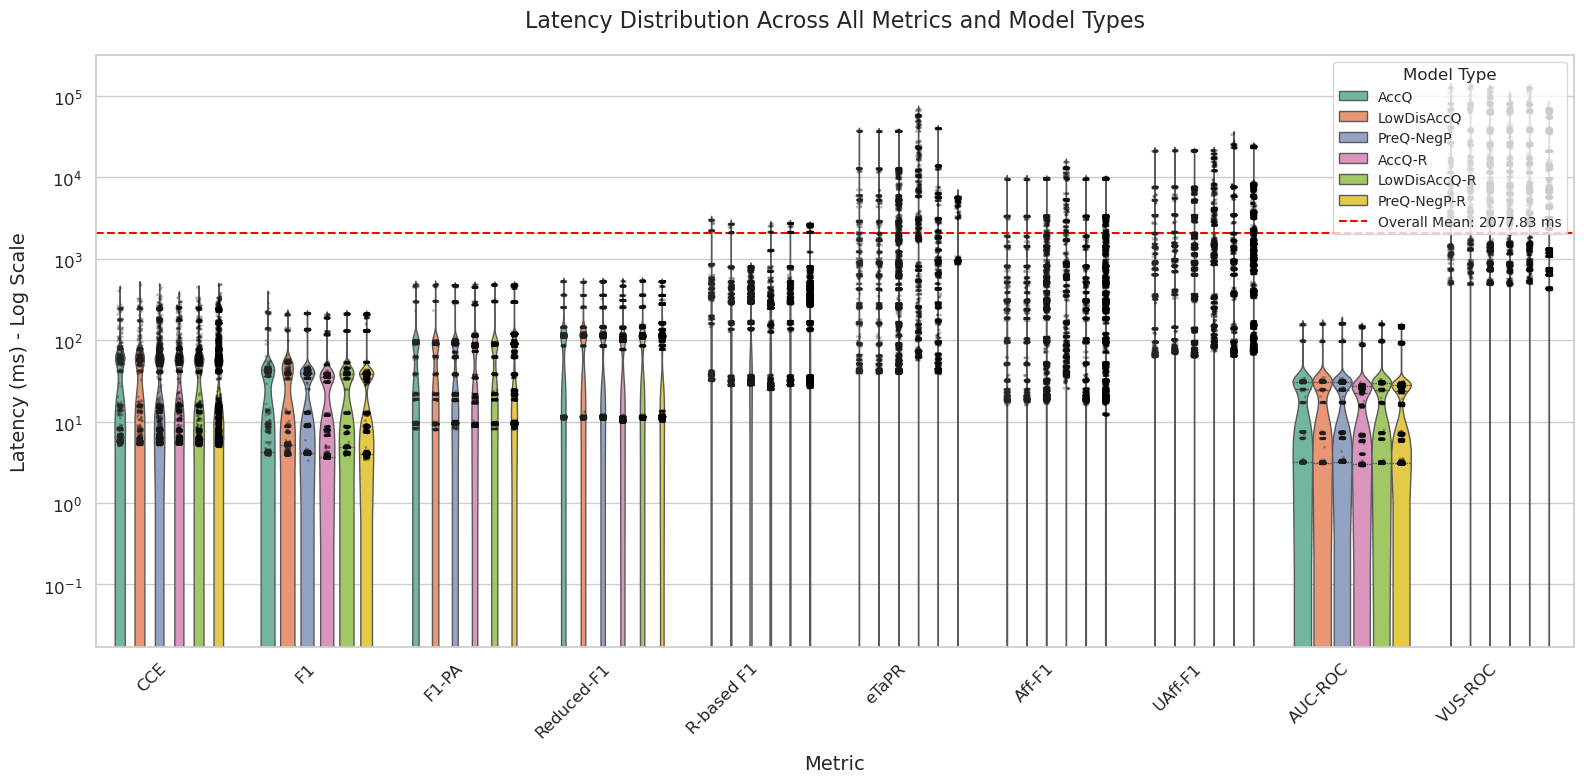

In [8]:
default_baseline_list = ['CCE', 'F1', 'F1-PA', 'Reduced-F1', 'R-based F1', 'eTaPR', 'Aff-F1', 'UAff-F1', 'AUC-ROC', 'VUS-ROC']
model_type_list = ['AccQ', 'LowDisAccQ', 'PreQ-NegP', 'AccQ-R', 'LowDisAccQ-R', 'PreQ-NegP-R']
import os
proj_pth = r'/home/zzj/projects/CCE'
log_dir = os.path.join(proj_pth, 'logs')

plots_dir = os.path.join(log_dir, 'RankEval', 'plots')
# Ensure the plots directory exists
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

import argparse
import pandas as pd
from typing import List, Union
import seaborn as sns
import matplotlib.pyplot as plt

# argparser = argparse.ArgumentParser(description="Run latency-based evaluation benchmark for model metrics.")
# argparser.add_argument('--metric_list', type=str, nargs='+', default=default_baseline_list, help='List of baselines to evaluate.')
# argparser.add_argument('--task_list', type=str, nargs='+', default=model_type_list, help='List of model types to evaluate.')



def ana_lantancy_all(metric_list, task_list):
    # 对任意指标在所有数据集，所有任务类型上计算

    sns.set_theme(style="whitegrid")
    
    # 收集所有数据
    all_data = None
    for metric in metric_list:
        metric_dir = os.path.join(log_dir, metric)
        for task in task_list:
            metric_file = os.path.join(metric_dir, f'{task}_log.csv')
            latency_df = pd.read_csv(metric_file)
            
            # 提取需要的列并添加任务类型标识
            sub_df = latency_df[['metric_name', 'latency', 'model_name']].copy()
            sub_df['task_type'] = task  # 添加任务类型列用于分组
            
            # 合并数据
            if all_data is None:
                all_data = sub_df
            else:
                all_data = pd.concat([all_data, sub_df], ignore_index=True)
    
    # 创建大图
    plt.figure(figsize=(16, 8))
    
    # 使用小提琴图展示分布特征
    ax = sns.violinplot(
        x='metric_name', 
        y='latency', 
        # hue='task_type', 
        data=all_data,
        palette='Set2',
        split=False,  # 不拆分小提琴图
        inner='quartile',  # 在小提琴内部显示四分位数
        linewidth=1
    )
    
    # 叠加散点图展示原始数据点，增强分布感知
    sns.stripplot(
        x='metric_name', 
        y='latency', 
        # hue='task_type', 
        data=all_data,
        palette='dark:black', 
        size=2, 
        alpha=0.3, 
        dodge=True,  # 与小提琴图对齐
        jitter=True  # 添加轻微抖动避免点重叠
    )
    
    # 设置y轴为对数刻度，更好地展示可能存在的大范围值
    ax.set_yscale('log')
    
    # 添加整体平均值线
    overall_mean = all_data['latency'].mean()
    ax.axhline(
        overall_mean, 
        color='red', 
        linestyle='--', 
        linewidth=1.5,
        label=f'Overall Mean: {overall_mean:.2f} ms'
    )
    
    # 设置标题和标签
    plt.title('Latency Distribution Across All Metrics and Model Types', fontsize=16, pad=20)
    plt.xlabel('Metric', fontsize=14, labelpad=10)
    plt.ylabel('Latency (ms) - Log Scale', fontsize=14, labelpad=10)
    
    # 旋转x轴标签避免重叠
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # 调整图例
    handles, labels = ax.get_legend_handles_labels()
    # 只保留一套图例（小提琴图和散点图会各生成一套）
    unique_labels = list(dict.fromkeys(labels))  # 保持顺序去重
    unique_handles = [handles[labels.index(label)] for label in unique_labels]
    ax.legend(unique_handles, unique_labels, title='Model Type', 
              fontsize=10, title_fontsize=12, loc='upper right')
    
    # 调整布局
    plt.tight_layout()
    
    # 保存图片
    # plt.savefig(os.path.join(plots_dir, 'latency_distribution_overall.pdf'), bbox_inches='tight', dpi=300)
    
    # 显示图片
    plt.show()
        
            

def ana_lantency(metric_list,task_list):
    # 对任意指标在所有数据集，单个任务类型上计算
    pass

metric_list = default_baseline_list
task_list = model_type_list

# 调用函数进行分析
ana_lantancy_all(metric_list, task_list)
    
    # 如果需要单个任务类型的分析，可以调用 ana_lantancy 函数
    # ana_lantancy(metric_list, task_list[0])  # 例如只分析第一个任务类型